In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hotel=pd.read_csv('C:/Users/admin/Documents/guided project/guided-project/hotel_bookings.csv')

In [909]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


###  cleaning the nans

In [ ]:
hotel.info()

In [ ]:
hotel.describe()

In [ ]:
hotel['company'].value_counts(dropna=False)

In [ ]:
hotel=hotel.drop('company',axis=1)

I saw that the company columns have over 110000 nans.  I decided to drop that column because we anyway have barely info. about it.

In [ ]:
hotel['children'].value_counts(dropna=False)

In [ ]:
hotel['children']=hotel['children'].fillna(0)

In [ ]:
hotel['children'].value_counts(dropna=False)

There were 4 nans in the chidrens columns so I replaced them with 0 because that was the most common value.

In [ ]:
hotel['country'].describe()

In [ ]:
hotel['country'].value_counts(dropna=False)

In [ ]:
hotel['country']=hotel['country'].fillna('PRT')

In [ ]:
hotel['country'].value_counts(dropna=False)

There were 488 nans in the country columns so I replaced them with 'prt' because that was by far the most common value.

In [ ]:
hotel['agent'].value_counts(dropna=False)

In [ ]:
hotel=hotel.drop('agent',axis=1)

In [ ]:
hotel.isna().any()

I deleted the agent column because there were quite a few nans and  This column isn't important for this analysis.

#### Exploring the data

In [ ]:
hotel['customer_type'].describe()

In [ ]:
hotel['adr'].describe()

In [ ]:
hotel['meal'].unique()

In [ ]:
hotel['required_car_parking_spaces'].value_counts()	

It looks like 8 parking spaces are outliers for the amount of parking required

In [ ]:
hotel['required_car_parking_spaces'].describe()	

In [ ]:
hotel['booking_changes'].value_counts()

In [ ]:
changes={'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January' : 1 ,  'February' : 2, 'March': 3, 'April' :4, 'May':5, 'June':6}
hotel['arrival_date_month']=hotel['arrival_date_month'].map(changes)



In [ ]:

hotel['arrival_date']=pd.to_datetime(dict( month=hotel.arrival_date_month, day=hotel.arrival_date_day_of_month,year=hotel.arrival_date_year))

In [ ]:
hotel['arrival_date'].head()

I made a new column that gives a date of arrival combining the day month and year to make it easier to analyze.

In [ ]:
hotel.columns

In [ ]:
hotel_shrunked=hotel.drop([ 'lead_time', 'arrival_date_week_number', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 
       'days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',],axis=1)

In [ ]:
hotel_shrunked.head(10)

Shrunk the data by dropping all columns that are not necessary for this analysis to make it easier to work with.

Text(0.5, 0.98, 'The count of arrivals per year')

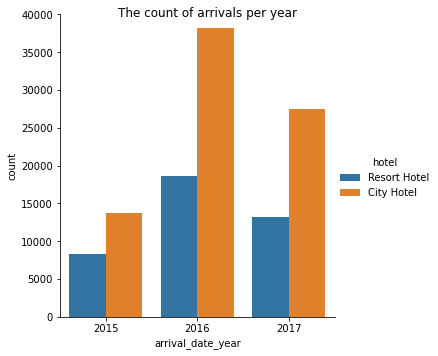

In [893]:

sns.catplot(data=hotel_shrunked, x='arrival_date_year',kind='count',hue='hotel')
plt.suptitle('The count of arrivals per year')


We see that the city hotel is busier than resort hotel. in 2015 there weren't many people going to hotels in 2016 it went up drastically and went a little down by 2017.   

I would like to analyze if kids go to hotels,  what months they come, if it's worth trying to attract them and more. 

In [ ]:
hotel_shrunked.columns

In [ ]:
hotel_adults=hotel_shrunked.reindex(hotel_shrunked.index.repeat(hotel_shrunked.adults))

In [ ]:
hotel_babies=hotel_shrunked.reindex(hotel_shrunked.index.repeat(hotel_shrunked.babies))

In [ ]:
hotel_children=hotel_shrunked.reindex(hotel_shrunked.index.repeat(hotel_shrunked.children))

I wanted to combine the children adults and babies columns so i made a separate dataset for each type. I duplicated the rows according to the number that's in that column. The one that had a 0 got deleted.  

In [ ]:
hotel_children['children'].value_counts()

In [ ]:
hotel_children['children']=hotel_children['children'].replace([1,2,3,10],'children')

In [ ]:
hotel_babies['babies']=hotel_babies['babies'].replace([1,2,9,10],'babies')

In [ ]:
hotel_adults.head()
hotel_adults['adults']=hotel_adults['adults'].replace([1,2,3,4,5,6,26,10,20,40,50,27,55],'adults')

In [ ]:
hotel_adults.rename(columns={"adults": "people"}, inplace=True)

In [ ]:
hotel_adults.columns

In [ ]:
hotel_babies.rename(columns={"babies": "people"}, inplace=True)

In [ ]:
hotel_children.rename(columns={"children": "people"}, inplace=True)

for each data frame I changed the values of the column to children, adult, or baby. I renamed those cols. people

In [ ]:
people=pd.concat([hotel_adults, hotel_children,hotel_babies], axis=0)

concated the three data frames into one.I have now one column that's called people and the values are baby, adult , or child.

In [894]:
people['people'].value_counts()

adults      221636
children     12403
babies         949
Name: people, dtype: int64

Text(0.5, 0.98, 'The range of ages per hotel')

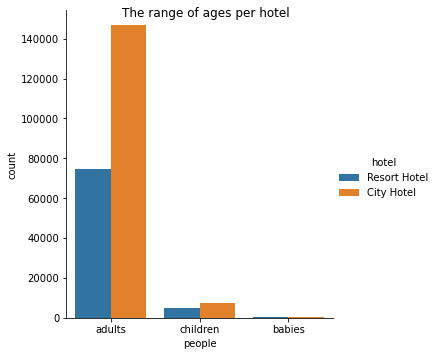

In [896]:
sns.catplot(data=people, x='people',kind='count',hue='hotel')
plt.suptitle('The range of ages per hotel')

We see that there are barely any babies in both hotels. Children are a small percentage of the people. We can also see that the resort hotel has a little bigger percentage of children than the city hotel.

In [ ]:
hotel_shrunked['arrival_date_year'].unique()

Text(0.5, 1.1, 'count of arrivals per year')

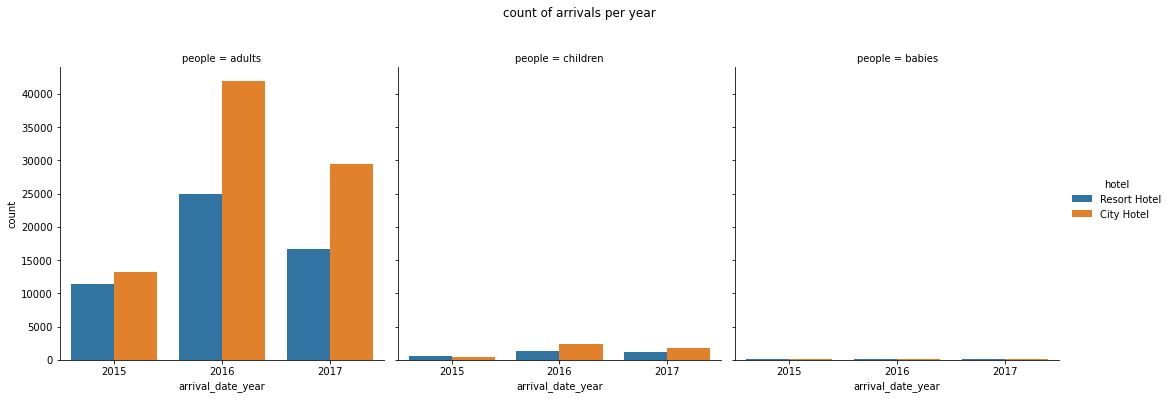

In [902]:
sns.catplot(data=people[people['is_canceled']==0], col='people',x='arrival_date_year',kind='count',hue='hotel')
plt.suptitle('count of arrivals per year', y=1.1)

Text(0.5, 1.1, 'count of arrivals per year (including canceled)')

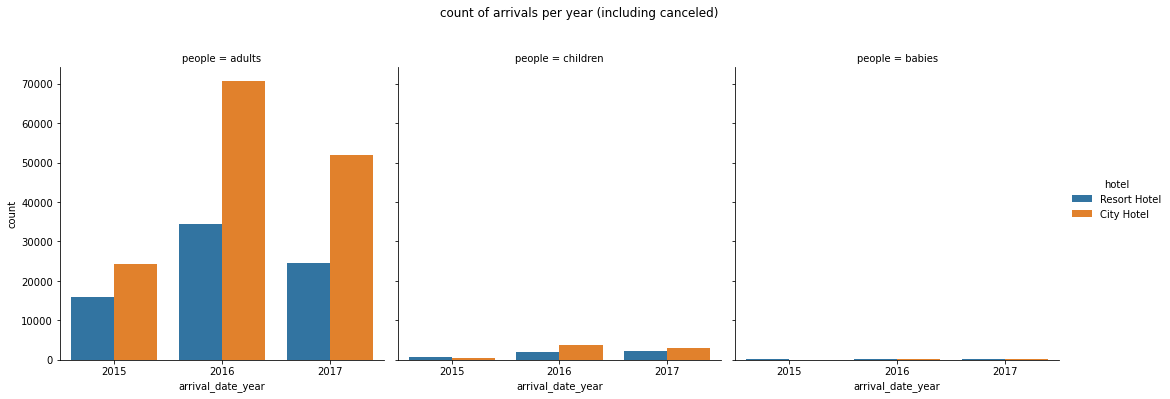

In [903]:
sns.catplot(data=people, col='people',x='arrival_date_year',kind='count',hue='hotel')
plt.suptitle('count of arrivals per year (including canceled)', y=1.1)

Text(0.5, 1.1, 'count of arrivals per year')

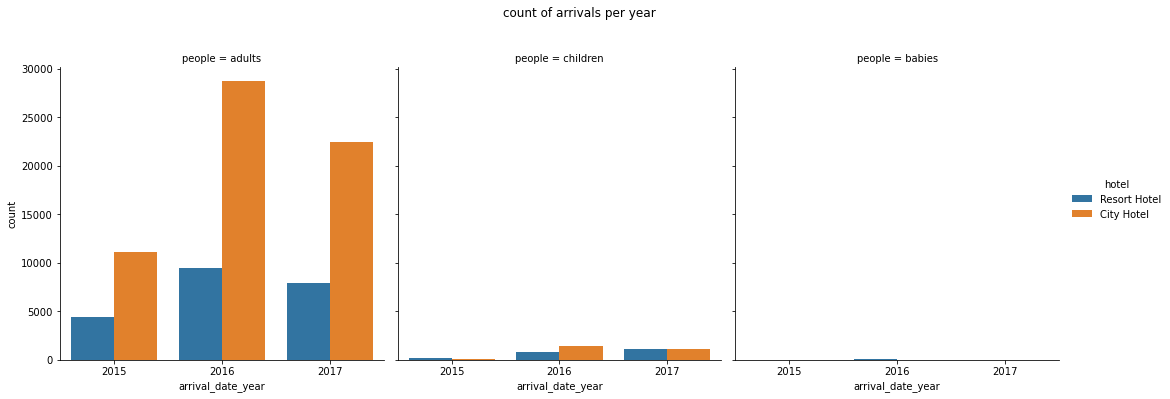

In [901]:
sns.catplot(data=people[people['is_canceled']==1], col='people',x='arrival_date_year',kind='count',hue='hotel')
plt.suptitle('count of canceled arrivals per year', y=1.1)

I plotted 3  plots to see the count of arrivals that whore canceled that whore not canceled and the total. I see that in resort hotel there are more cancelations compared to the number of people that booked. I would like to check if people with kids cancel more often.

Text(0.5, 1.1, 'percent of canceled arrivals per hotel')

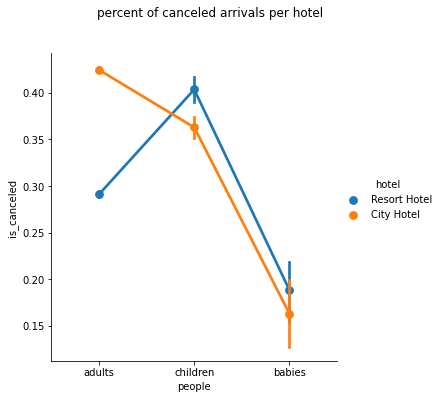

In [905]:
sns.catplot(data=people ,x='people',y='is_canceled', kind='point',hue='hotel')
plt.suptitle('percent of canceled arrivals per hotel', y=1.1)

I tried checking out if the cancelation are people with kids or without but I didn't feel like it gave me enough info. so I decided to try a different way. 

Text(0.5, 1.1, 'percent of canceled children arrivals per hotel')

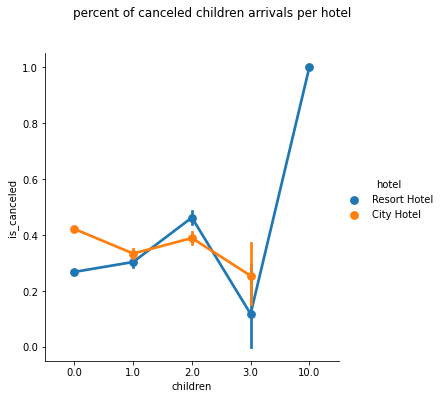

In [906]:
sns.catplot(data=hotel ,x='children',y='is_canceled', kind='point',hue='hotel')
plt.suptitle('percent of canceled children arrivals per hotel', y=1.1)

In [888]:
hotel['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Text(0.5, 1.1, 'percent of canceled babies arrivals per hotel')

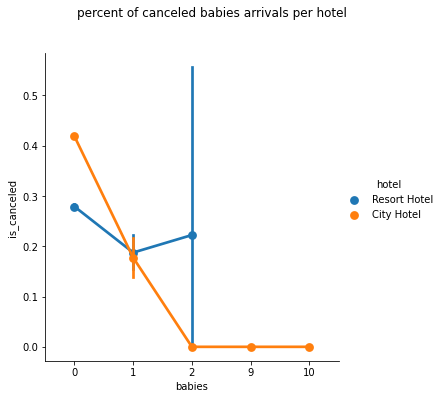

In [907]:
sns.catplot(data=hotel ,x='babies',y='is_canceled', kind='point',hue='hotel')
plt.suptitle('percent of canceled babies arrivals per hotel', y=1.1)

Now that I have also 0 children and babies I could analyze these better. In the children's plot, we see that in the resort hotel the booking of 10 children where canceled, and a lot of the 2 children were canceled. in the city hotel, it looks like people without children cancel more. Not many people with babies canceled.

Text(0.5, 1.1, 'percent of children comparing to adults')

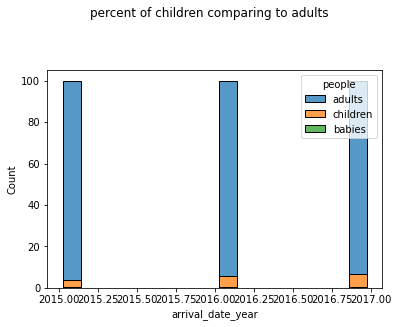

In [908]:
plot = people.groupby(['arrival_date_year'])['people'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
sns.histplot(x = 'arrival_date_year' , hue = 'people',
             multiple = 'stack',weights= 'percentage',data=plot,shrink = 0.7,bins=12)
plt.suptitle('percent of children comparing to adults', y=1.1)

<AxesSubplot:xlabel='arrival_date_month', ylabel='Count'>

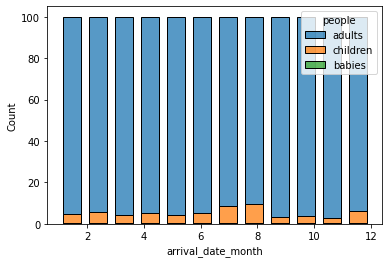

In [871]:
plot = people.groupby(['arrival_date_month'])['people'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
sns.histplot(x = 'arrival_date_month' , hue = 'people',
             multiple = 'stack',weights= 'percentage',data=plot,shrink = 0.7,bins=12)
plt.suptitle('percent of children comparing to adults', y=1.1)

We can see the percent of the children vs adults which helps us analyze when kids come to the hotel. It seems that during summer and winter vacations there are more kids that come, and in the beginning of the school year there are barely any kids that come.

 Conclusion
 It looks like people in city hotel cancel more than in resort hotel. In city hotel the cancelation are mainly from people without children, in resort hotel there are a lot that cancel with children. The kids come more during vacation time.It seems that in 2017 the children percentage rose in the resort hotel. 